In [1]:
from ostir import run_ostir
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
from src.utils.sequences import dna_to_rna
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/output/with_factors.csv")

In [3]:
df.head(1)

,Unnamed: 0,sequence_dna,fitness,p_value,standard_error,mutated_wildtype_dna,rna_loops,mutated_amino_acids,minimum_free_energy,non_wildtype_rbs_rate,rbs_results,rbs_expression_99,rbs_expression_100,rbs_expression_101,rbs_expression_38,rbs_expression_70,rbs_expression_103,rbs_expression_105,rbs_expression_106,rbs_expression_107,rbs_expression_104,rbs_expression_102,rbs_expression_82,rbs_expression_87,rbs_expression_25
0,0,GCCGATCTC,0.0,NaN,NaN,AATTTTTTTTATCGGGAAATCTCAATGATCAGTCTGATTGCGGCGT...,..........((((((..(((.....)))...))))))...((((....,ADL,-37.400002,20.4062,"[{'name': 'unnamed', 'start_codon': 'ATG', 'st...",0.0,0.0,0.0,17.239,0.5859,0.0,0.0,0.0,0.0,0.0,0.0,2.5786,0.0027,670.2197


In [4]:
df["normalized_fitness"] = df.apply(lambda row: row["fitness"] - df[df["mutated_amino_acids"] == row["mutated_amino_acids"]]["fitness"].mean(), axis=1)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='fitness', ylabel='rbs_expression_105'>

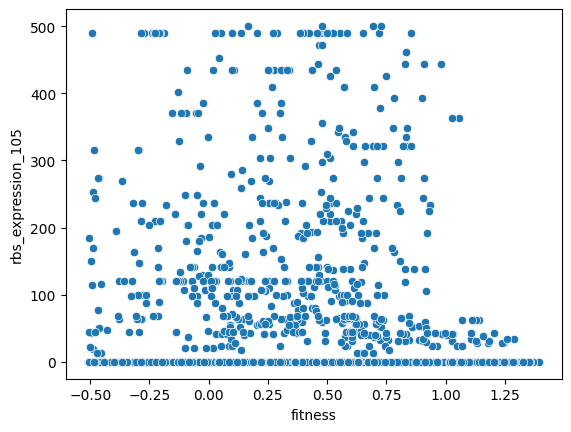

In [5]:
sns.scatterplot(data=df, x="fitness", y="rbs_expression_105")

In [6]:
correlation = pd.read_csv("../data/output/correlation.csv")
correlation["aa"] = correlation["Unnamed: 0"].map(lambda x: x.replace("(", "").replace(")", "").replace("'", "").replace(",", ""))
correlation["num_sequences"] = correlation["aa"].map(lambda x: len(df[df["mutated_amino_acids"] == x]))

In [7]:
correlation_104 = correlation[correlation.rbs_expression_104_correlation_p_value < 0.05]
len(correlation_104)

35

In [8]:
samples_104 = df[df.mutated_amino_acids.isin(correlation_104.aa)]
len(samples_104)

808

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='normalized_fitness', ylabel='rbs_expression_104'>

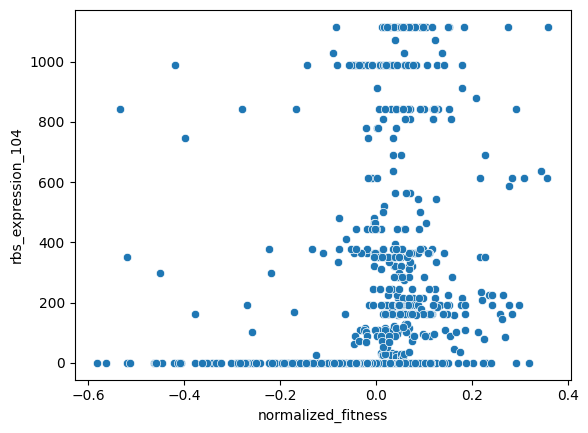

In [9]:
sns.scatterplot(data=samples_104, x="normalized_fitness", y="rbs_expression_104")

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_82812/1889824154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.rbs_expression_104 > 50].normalized_fitness, label="rbs_expression_104 > 50")
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

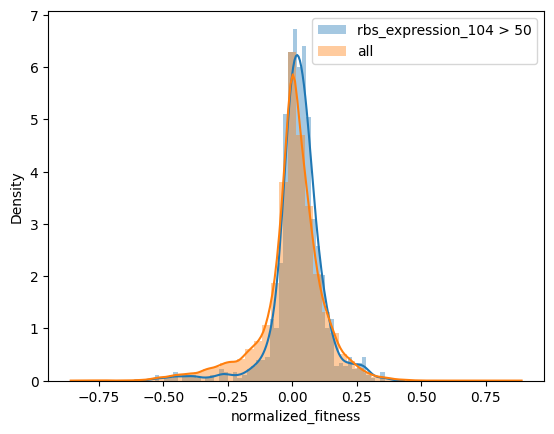

In [10]:
sns.distplot(df[df.rbs_expression_104 > 50].normalized_fitness, label="rbs_expression_104 > 50")
sns.distplot(df.normalized_fitness, label="all")
plt.legend()

<Axes: >

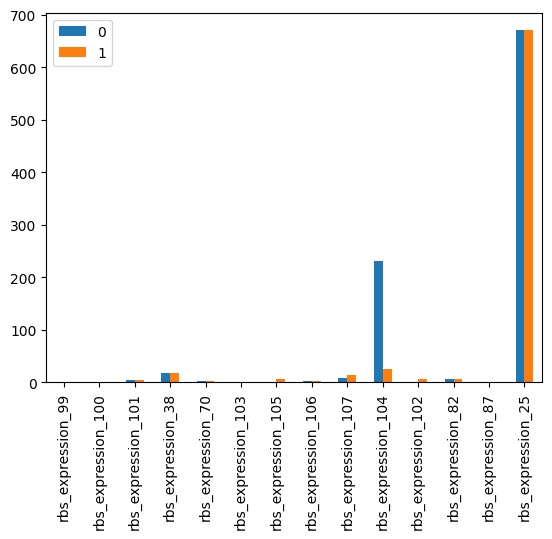

In [11]:
rbs_cols = [col for col in df.columns if "rbs_expression" in col]
(
    pd.concat([samples_104[rbs_cols].mean(), df[rbs_cols].mean()], axis=1)
    .plot.bar()
)

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcor

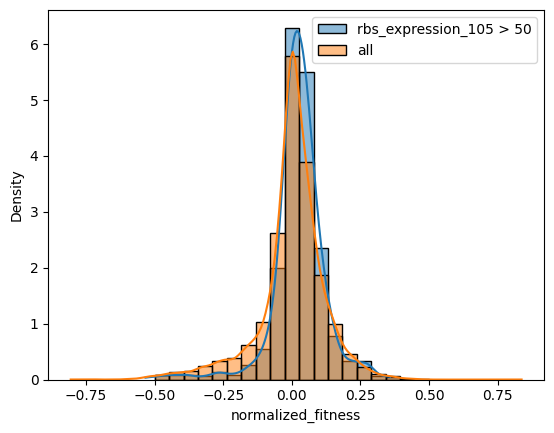

In [12]:
bins = np.linspace(-0.5, 0.5, 20)
sns.histplot(df[df.rbs_expression_104 > 50].normalized_fitness, label="rbs_expression_105 > 50", stat="density", bins=bins, kde=True)
sns.histplot(df.normalized_fitness, label="all", stat="density", bins=bins, kde=True)
plt.legend()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcor

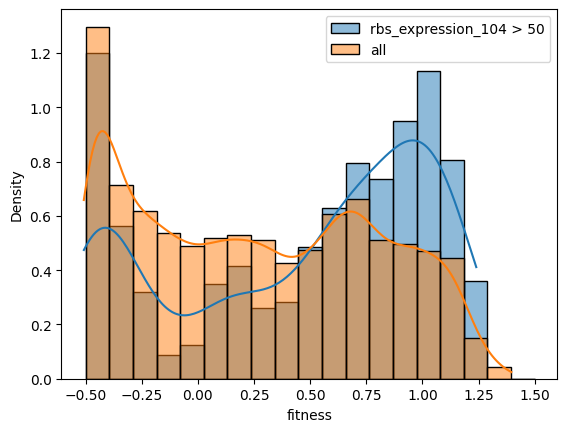

In [14]:
bins = np.linspace(-0.5, 1.5, 20)
sns.histplot(df[df.rbs_expression_104 > 50].fitness, label="rbs_expression_104 > 50", stat="density", bins=bins, kde=True)
sns.histplot(df.fitness, label="all", stat="density", bins=bins, kde=True)
plt.legend()

/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tobiaochsner/Documents/ETH/GeneticFitness/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rbs_expression_104', ylabel='Count'>

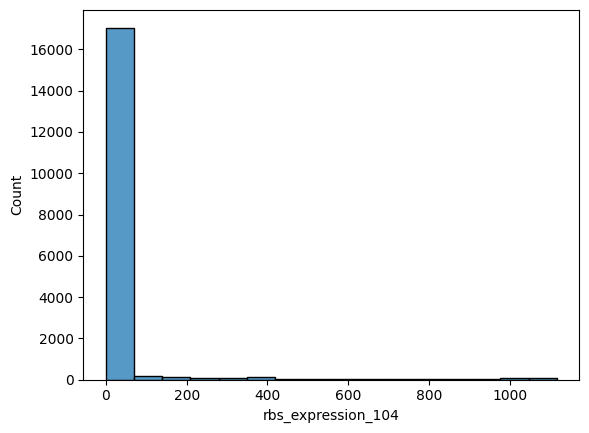

In [15]:
sns.histplot(df, x="rbs_expression_104")

In [82]:
len(df[df.rbs_expression_104 > 50]), len(df[df.rbs_expression_104 > 50]) / len(df)

(998, 0.055324574532956375)

In [21]:
correlation[correlation.aa == "TDT"]

,Unnamed: 0,non_wildtype_rbs_rate_correlation,minimum_free_energy_correlation,rbs_expression_25_correlation,rbs_expression_38_correlation,rbs_expression_70_correlation,rbs_expression_82_correlation,rbs_expression_87_correlation,rbs_expression_99_correlation,rbs_expression_100_correlation,rbs_expression_101_correlation,rbs_expression_102_correlation,rbs_expression_103_correlation,rbs_expression_104_correlation,rbs_expression_105_correlation,rbs_expression_106_correlation,rbs_expression_107_correlation,non_wildtype_rbs_rate_correlation_p_value,minimum_free_energy_correlation_p_value,rbs_expression_25_correlation_p_value,rbs_expression_38_correlation_p_value,rbs_expression_70_correlation_p_value,rbs_expression_82_correlation_p_value,rbs_expression_87_correlation_p_value,rbs_expression_99_correlation_p_value,rbs_expression_100_correlation_p_value,rbs_expression_101_correlation_p_value,rbs_expression_102_correlation_p_value,rbs_expression_103_correlation_p_value,rbs_expression_104_correlation_p_value,rbs_expression_105_correlation_p_value,rbs_expression_106_correlation_p_value,rbs_expression_107_correlation_p_value,non_wildtype_rbs_rate_correlation_significant,minimum_free_energy_correlation_significant,rbs_expression_25_correlation_significant,rbs_expression_38_correlation_significant,rbs_expression_70_correlation_significant,rbs_expression_82_correlation_significant,rbs_expression_87_correlation_significant,rbs_expression_99_correlation_significant,rbs_expression_100_correlation_significant,rbs_expression_101_correlation_significant,rbs_expression_102_correlation_significant,rbs_expression_103_correlation_significant,rbs_expression_104_correlation_significant,rbs_expression_105_correlation_significant,rbs_expression_106_correlation_significant,rbs_expression_107_correlation_significant,aa,num_sequences
1473,"('TDT',)",-0.75391,-0.017831,NaN,NaN,-0.429897,-0.729961,-0.493201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.297481e-07,0.922836,NaN,NaN,0.014061,0.000002,0.004128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,TDT,32
